Criando as caracteristicas dos meus dados na mão para poder classificar.
As caracteristicas analisadas aqui serão:
- Pelo longo - 1 ou 0
- Perna curta - 1 ou 0
- Se o animal late - 1 ou 0

No final vamos classficar entre porco e cachorro apenas com essas caracteriscas simples, onde porco será classificado como 1 e cachorro como 0.

In [1]:
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

treino_x  = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1, 1, 1, 0, 0, 0]

In [2]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC()

In [3]:
animal_misteriroso = [1,1,1]
model.predict([animal_misteriroso])

array([0])

In [4]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0, 1, 1]


In [5]:
previsoes = model.predict(teste_x)

In [6]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acertos = corretos/total

print('Taxa de acerto: %.2f' % (taxa_de_acertos * 100))

Taxa de acerto: 66.67


In [7]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print('Taxa de acerto: %.2f' % (taxa_de_acertos * 100))

Taxa de acerto: 66.67


# Apartir de agora sera outro estudo com um dado que foi coletado em:
https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv

In [8]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"

dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [9]:
mapa = {
    'home': 'principal',
    'how_it_works': 'como_funciona',
    'contact': 'contato',
    'bought': 'comprou'
}
dados = dados.rename(columns= mapa)

In [10]:
x = dados[['principal', 'como_funciona', 'contato']]
y = dados['comprou']

In [11]:
dados.shape

(99, 4)

In [12]:
treino_x = x[:75]
treino_y = y[:75]

teste_x = x[75:]
teste_y = y[75:]

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

Treinaremos com 75 elementos e testaremos com 24 elementos


In [13]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC()

In [14]:
previsoes = modelo.predict(teste_x)

In [15]:
acuracia = accuracy_score(teste_y, previsoes) * 100

In [16]:
print('A acurácia foi %.2f%%' % acuracia)

A acurácia foi 95.83%


Utilizando o metodo train_test_split para separar a nossa base

In [17]:
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=SEED,
                                                        stratify=y)
print(treino_y.value_counts())
print(teste_y.value_counts())

0    49
1    25
Name: comprou, dtype: int64
0    17
1     8
Name: comprou, dtype: int64


In [18]:
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

Treinaremos com 74 elementos e testaremos com 25 elementos


In [19]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % acuracia)

A acurácia foi 96.00%


Novo arquivo de dados para estudo:
https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv

In [20]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [21]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [22]:
trocar = {
    0: 1,
    1: 0
}
dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [23]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

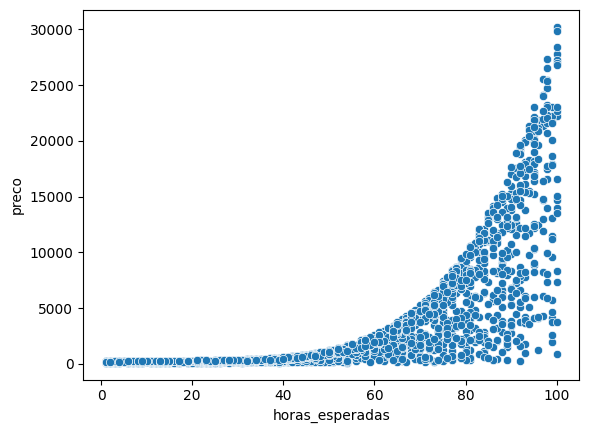

In [24]:
import seaborn as sns
sns.scatterplot(x= 'horas_esperadas', y='preco', data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

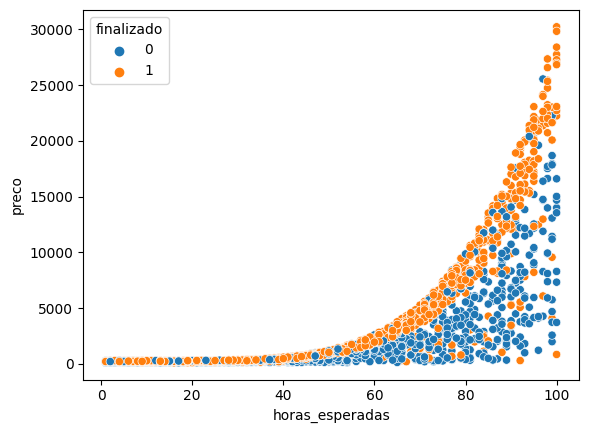

In [25]:
sns.scatterplot(x= 'horas_esperadas', y='preco', hue='finalizado', data=dados)

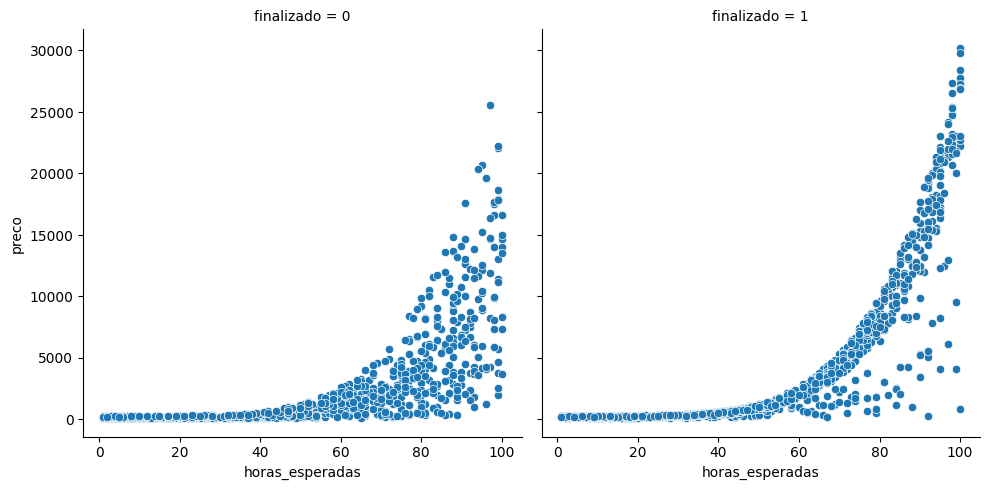

In [26]:
sns.relplot(x='horas_esperadas', y='preco', col='finalizado', data=dados)

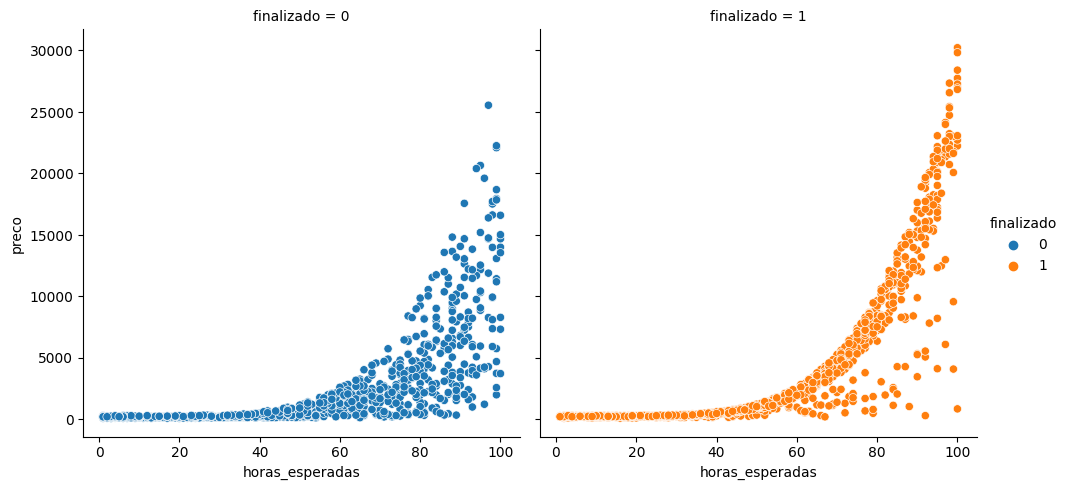

In [27]:
sns.relplot(x='horas_esperadas', y='preco', hue='finalizado', col='finalizado', data=dados)

In [28]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [29]:
SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=SEED,
                                                        stratify=y)

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 54.26%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [30]:
import numpy as np

previsoes_de_base = np.ones(540)

In [31]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=SEED,
                                                        stratify=y)

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print('A acurácia do algoritmo de baseline foi de %.2f%%' % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia do algoritmo de baseline foi de 52.59%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Vimos que mesmo chutando os valores da previsão estão muito proximo ao valor treinado. Então nossa ideia é melhorar o nosso modelo para ficar melhor que a nossa baseline

<Axes: xlabel='horas_esperadas', ylabel='preco'>

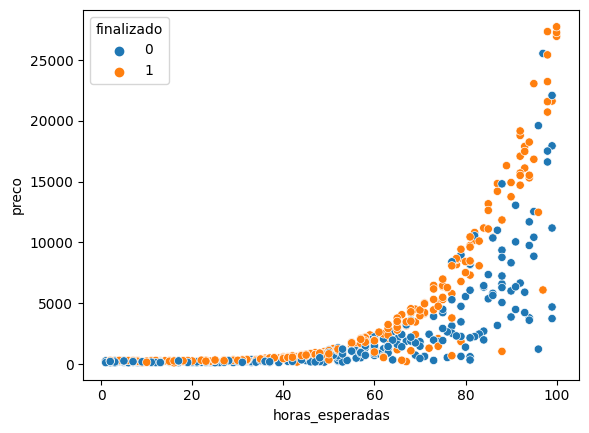

In [32]:
sns.scatterplot(x= 'horas_esperadas', y='preco', hue=teste_y, data=teste_x)

In [33]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max)
print(y_min, y_max)

1 100
101 27738


In [34]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [35]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [36]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [37]:
import matplotlib.pyplot as plt

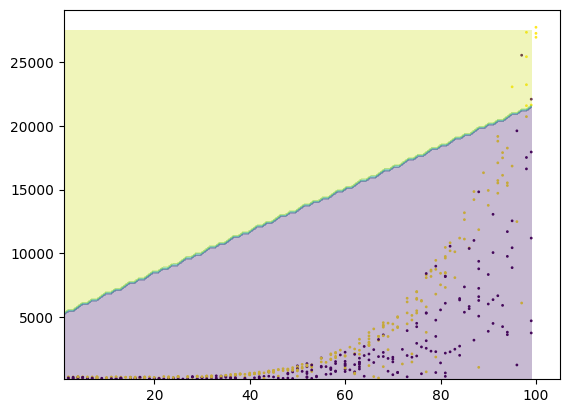

In [38]:
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)
plt.contourf(xx, yy, Z, alpha=0.3)

Ficou muito ruim, a curva está muito baixa e ele diz que todos os projetos serão finalizados, ou seja é um chute que está sendo muito ruim para o nosso problema.

OBS: no momento que foi roda foi assim, se rodar de novo pode ser que o grafico mude e a analise seja diferente. O que deixa ainda sim ruim pq há uma aleatoriedade e não consiguimos replicar o resultado.

Então usaremos um SEED para o modelo poder replicar o mesmo valor.

In [39]:
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size=0.25,
                                                        stratify=y)

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print('A acurácia do algoritmo de baseline foi de %.2f%%' % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia do algoritmo de baseline foi de 52.59%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Quando não especifico o SEED ele usa o do numpy(np) que estamos gerando anteriormente

<Axes: xlabel='horas_esperadas', ylabel='preco'>

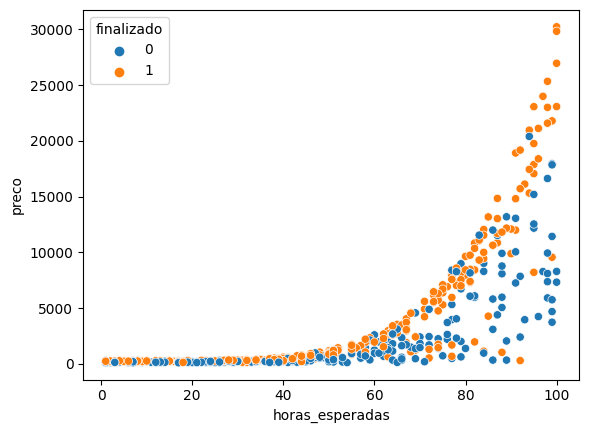

In [40]:
sns.scatterplot(x= 'horas_esperadas', y='preco', hue=teste_y, data=teste_x)

In [41]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max)
print(y_min, y_max)

1 100
100 30223


In [42]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [43]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [44]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

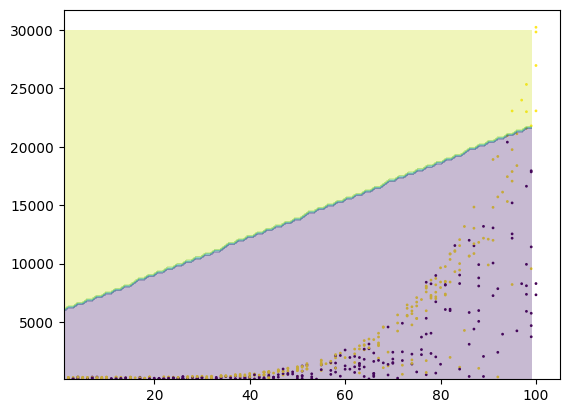

In [45]:
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)
plt.contourf(xx, yy, Z, alpha=0.3)

Agora vai ser sempre o mesmo independendo da quatidade de vezes que vamos rodar, mas ainda não parece bom

Vamos ver se o problema era o modelo que estavamos utilizando e ao inves de um modelo linear LinearSVC vamos usar apenas o modelo SVC e analisar o resultado.

In [46]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size=0.25,
                                                        stratify=y)

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print('A acurácia do algoritmo de baseline foi de %.2f%%' % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia do algoritmo de baseline foi de 52.59%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


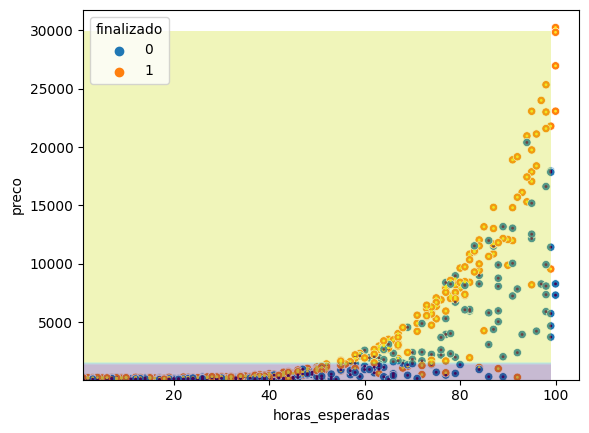

In [47]:
sns.scatterplot(x= 'horas_esperadas', y='preco', hue=teste_y, data=teste_x)

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)
plt.contourf(xx, yy, Z, alpha=0.3)

Vemos que ficou diferente, a porcentagem de acertos ficou a mesma porém agora vemos outros pontos que são os verdes que são onde ele acha que é 1.

Talvez um problema agora seja a escala, temos uma escala de 0 a 100 no x e uma de 0 a 30000 no y, isso pode estar dificultando a analise do nosso modelo, vamos mudar a escala do nosso problema e ver se ele se ajusta.

In [48]:
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size=0.25,
                                                        stratify=y)

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print('A acurácia do algoritmo de baseline foi de %.2f%%' % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia do algoritmo de baseline foi de 52.59%


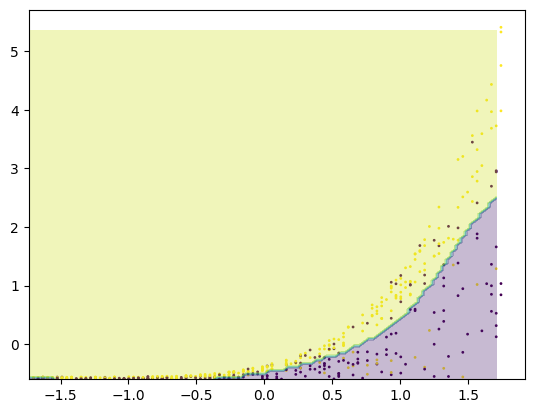

In [49]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.scatter(data_x, data_y, c=teste_y, s=1)
plt.contourf(xx, yy, Z, alpha=0.3)

Embora a porcentagem continue muito parece ou até igual, agora vemos como o modelo esta se adaptando melhor para os valores e agora vemos uma curva seprando melhor os pontos.

Vamos usar um outro modelo e utilizar outra base para o estudo.

In [62]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"

dados = pd.read_csv(uri)
dados

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [63]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}

dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [64]:
a_trocar = {
    'yes' : 1,
    'no' : 0
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [65]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [66]:
dados['km_por_ano'] = dados['milhas_por_ano'] * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [67]:
dados = dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [77]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size=0.25,
                                                        stratify=y)

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia do algoritmo de baseline foi de %.2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do algoritmo de baseline foi de 46.88%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Precisamos de uma baseline para entender se foi ruim ou não

In [84]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100
print('A acurácia do dummy stratified foi de %.2f%%' % acuracia)

A acurácia do dummy stratified foi de 58.00%


In [85]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy='most_frequent')
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100
print('A acurácia do dummy mostfrequent foi de %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi de 58.00%


In [87]:
SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size=0.25,
                                                        stratify=y)

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia do algoritmo de baseline foi de %.2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do algoritmo de baseline foi de 77.48%


Agora vimos um ganho muito grande em relação aos outros modelos.

Vamos utilizar outro modelo agora que é a Arvore de Decisão por que podemos ver o que ele define que é importante para a decisão que ele está tomando.

In [100]:
from sklearn.tree import DecisionTreeClassifier

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size=0.25,
                                                        stratify=y)

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia do algoritmo de baseline foi de %.2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do algoritmo de baseline foi de 79.28%


Não precisamos normalizar as features pq a arvore consegue trabalhar com os grandes numeros na escala.
Há uma diferença quando usamos mais ou menos profundidade na arvore, use com sabedoria.

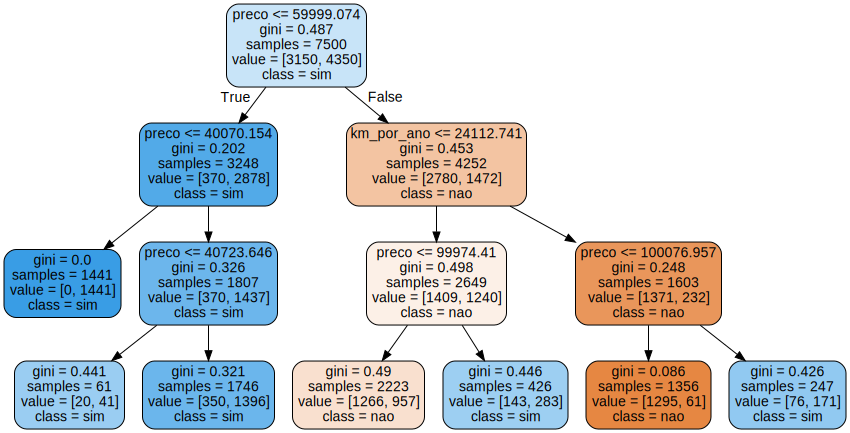

In [101]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled=True, rounded=True,
                           feature_names= features,
                           class_names= ['nao', 'sim'])
grafico = graphviz.Source(dot_data)
grafico